In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:

df= pd.read_csv("world_population.csv")
df




,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [9]:
missing_data=df.isnull().sum()
print(missing_data)
row=df[df.isnull().any(axis=1)]
print(row)

Series Name      3
Series Code      5
Country Name     5
Country Code     5
1990 [YR1990]    5
2000 [YR2000]    5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
2023 [YR2023]    5
dtype: int64
                                          Series Name Series Code  \
266                                               NaN         NaN   
267                                               NaN         NaN   
268                                               NaN         NaN   
269  Data from database: World Development Indicators         NaN   
270                          Last Updated: 11/13/2024         NaN   

    Country Name Country Code 1990 [YR1990] 2000 [YR2000] 2014 [YR2014]  \
266          NaN          NaN           NaN           NaN           NaN   
267          NaN          NaN           NaN           NaN           NaN   
268          NaN          NaN           NaN

C:\Users\tanuj\AppData\Local\Temp\ipykernel_12456\77985266.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


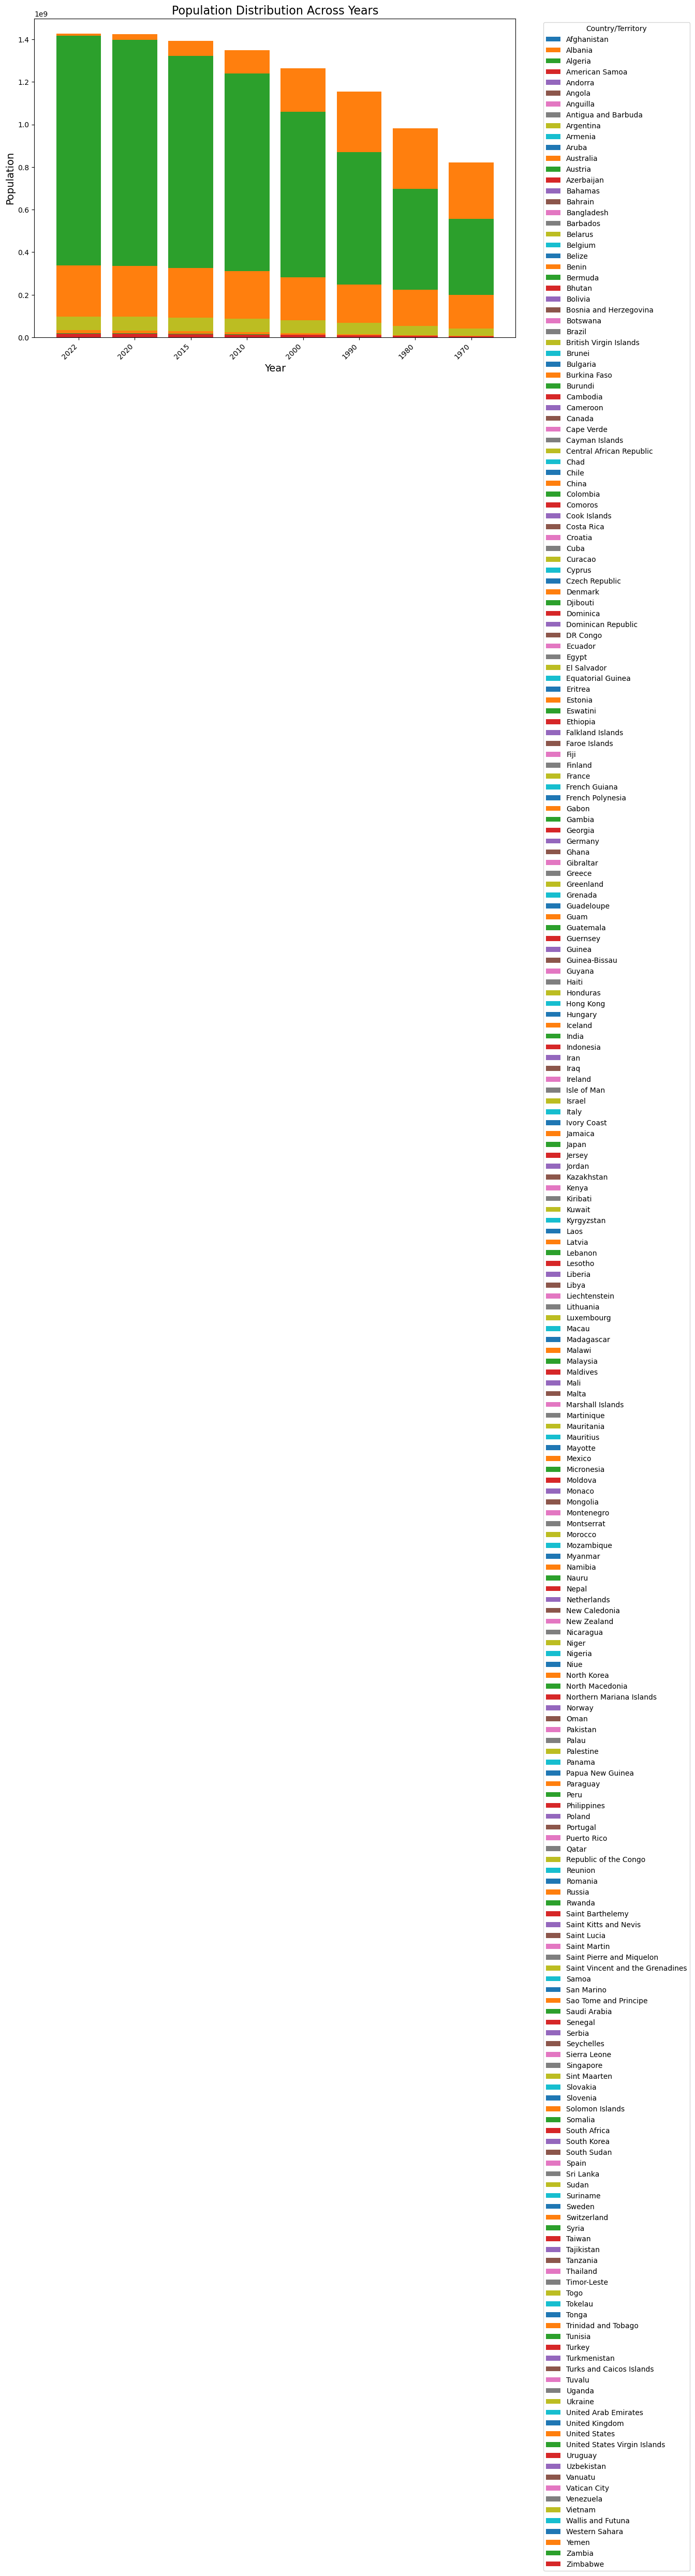

In [33]:


# Step 2: Keep only relevant columns (Country/Territory and Population columns)
population_columns = ['2022 Population', '2020 Population', '2015 Population', 
                      '2010 Population', '2000 Population', '1990 Population', 
                      '1980 Population', '1970 Population']
df = df[['Country/Territory'] + population_columns]

# Step 3: Reshape the data using melt
df_long = df.melt(id_vars=['Country/Territory'], 
                  var_name='Year', 
                  value_name='Population')

# Clean the 'Year' column to remove the word 'Population'
df_long['Year'] = df_long['Year'].str.replace(' Population', '')

# Step 4: Plot the grouped bar chart
plt.figure(figsize=(12, 8))

# Pivot the data to group by year
countries = df_long['Country/Territory'].unique()
for country in countries:
    country_data = df_long[df_long['Country/Territory'] == country]
    plt.bar(country_data['Year'], country_data['Population'], label=country)

# Customize the chart
plt.title("Population Distribution Across Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.legend(title='Country/Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show() 
